In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1. Load & Visualize the data

In [3]:
# Load
X = pd.read_csv("Training Data/Linear_X_Train.csv")
Y = pd.read_csv("Training Data/Linear_Y_Train.csv")

# convert to Numpy arrays
X = X.values
Y = Y.values

# Normalization
u = X.mean()
std = X.std()
X = (X - u)/std

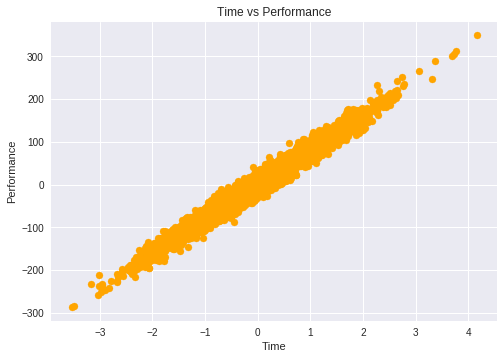

In [13]:
# Visulaize
plt.style.use('seaborn')
plt.scatter(X,Y,color='orange')
plt.title("Time vs Performance")
plt.xlabel("Time")
plt.ylabel("Performance")
plt.show()

### 2. Applying Linear Regression

In [5]:
def hypothesis(x,theta):
    # theta = [theta0, theta1]
    y = theta[0] + theta[1]*x
    return y

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    return total_error/m

def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(max_steps):
        # Compute Gradient
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        # update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        theta_list.append((theta[0],theta[1]))
    return theta, error_list, theta_list

In [6]:
theta, error_list, theta_list = gradientDescent(X,Y)

### 3. Predictions & Best fit line

In [8]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


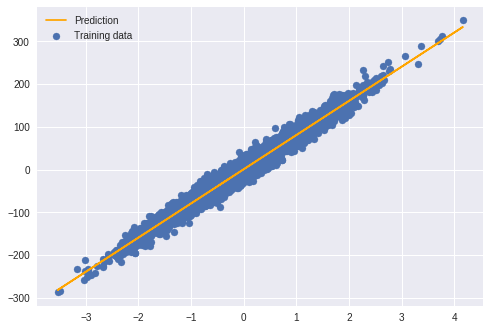

In [12]:
# Plot training data & predictions
plt.scatter(X,Y,label="Training data")
plt.plot(X,y_,color='orange',label='Prediction')
plt.legend()
plt.show()

In [10]:
# Loading the test data
X_test = pd.read_csv("Test Cases/Linear_X_Test.csv").values
Y_test = hypothesis(X_test,theta)
Y_test.shape

(1250, 1)

In [14]:
df  = pd.DataFrame(data=Y_test,columns=['y'])
df.to_csv('y_prediction.csv',index=False)